In [1]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm

In [ ]:
ff.read('bias15').loc[:,'20210104':'20240101'] + ff.read('turnover_score_ts_std')

<Axes: >

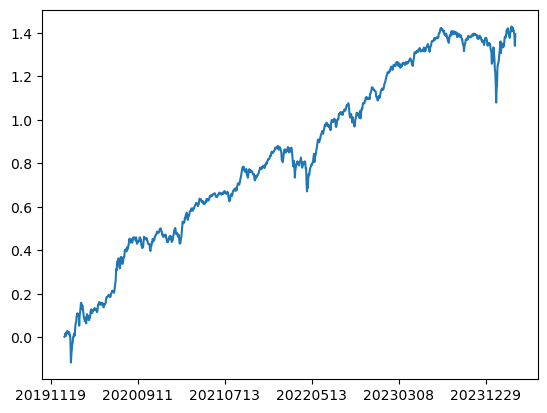

In [19]:
bias15 = ff.read('bias15','factor') + ff.read('turnover_score_ts_std')
bias15 = bias15 * ff.filter1[bias15.columns]
bias15 = bias15.rank()
bias15 = (bias15 < 100).replace({True:1,False:None})
rets_ = ff.rets_all.shift(-1,axis = 1)
(bias15 * rets_[bias15.columns]).mean().cumsum().plot()

In [2]:
open_day = pd.read_csv('tk_timing_signals.csv',index_col=0)['0']
open_day.index = pd.to_datetime(open_day.index, format='%Y%m%d').strftime('%Y%m%d')

In [3]:
factor_names1=['closer', 'openr', 'lowr', 'highr', 'ocret', 'lcret', 'hcret', 'ohret', 'ret5', 'ret10', 'ret20', 'ret30', 'excess5', 'excess10', 'excess20', 'excess30', 'ma5', 'bias5', 'ma10',
           'bias10', 'ma15', 'bias15', 'ma20', 'bias20', 'vwap_ret', 'vwaph_ret', 'll5', 'll15', 'll20', 'll30', 'a0', 'a5', 'a15', 'a30', 'ah5', 'ah10', 'ah15', 'std', 'amt_std', 'vol_std', 
           'amt_mean', 'vol_mean', 'turnover', 'turnover_mean', 'turnover_std', 'turnover_skew', 'turnoverf', 'turnoverf_mean', 'turnoverf_std', 'turnoverf_skew', 'mkv', 'l_mkv', 'lhret', 
           'STR', 'MTR', 'SMTR', 'ILLIQ','close','high','low']
factor_names2=['ARRP', 'ARRP_5d_20mean', 'AmpMod', 'BVol', 'CDPDVP', 'ILLIQ', 'IVoldeCorr', 'IntraDayMom20', 'MTR', 'RCP', 'SMTR', 'SPS', 'STR', 'a30', 
               'afternoon_ratio_1', 'ah15', 'amt', 'amt_ma20', 'amt_mean', 'amt_score0', 'amt_score1', 'amt_score2', 'amt_std', 'amt_std20', 'bias10', 'bias15', 'bias20', 'bias5', 
               'cross_std10', 'cross_std10adj', 'ctrade', 'excess10', 'excess20', 'excess30', 'excess5', 'growth_a', 'growth_b', 'growth_c', 'h_rankamt_corr_10', 'h_rankv_corr_10', 'h_rankv_corr_36', 
               'hcret', 'idiov', 'intro_high80_corr', 'ivr', 'l_mkv', 'mkv', 'mom1', 'mom_spring', 'nl_mkv', 'nl_mom', 'open0931ratio', 'open5ratio_ma10vol', 'rank_2_corr_hv10', 'rank_2_corr_hv20', 'rank_ha_corr_sum', 
               'ret20', 'ret30', 'ret5', 'roc121', 'roc20', 'roc240', 'roc5', 'scr', 'std', 'std20', 'std21', 'std240', 'stddev_cov', 'stddev_cov_right', 'sub', 'sysv', 'tail_ratio_1', 'tailrets0', 'tailrets1', 'tliq', 
               'turn20', 'turnover', 'turnover_mean', 'turnover_scale_z', 'turnover_score_ts_mean', 'turnover_score_ts_std', 'turnover_skew', 'turnover_std', 'turnoverf', 'turnoverf_mean', 'turnoverf_skew', 'turnoverf_std', 
               'up_KURS', 'up_plus_down_KURS', 'vol', 'vol_mean', 'vol_std', 'vol_std20', 'volroc_skew', '滞后日内量价corr']
factor_name3 =['accelerated_turnover_rank_RC','CSK_XYY_UP_DOWN_120D_RC','high_fre_vol_RC','high_fre_diff_vol_RC','high_fre_absdiff_vol_RC','peak_count_vol_RC','overnightsmart20_RC','CTR_RC','jumpCTR_RC','turnover_rate_proportion_l','synergy']
factor_name4 = ['ll60','ll120', 'lr5', 'lr10', 'lr20', 'lr30','lr60','lr120','posi60','posi120','posi240','nhigh20','nhigh60', 'nhigh120','nhigh20','nhigh60','nhigh120']
factor_name5 = ['rtn_condVaR', 'CTR_RC', 'jumpCTR_RC', 'openr', 'CCOIV', 'lr30', 'SZXZ', 'vol_DW', 'buy_sm_amount', 'lr20', 'TCV', 'ah10', 'buy_elg_amount', 'ret10', 'vol_LBQ', 'ah5', 'lr120', 'ma15', 'correlation_matrix13', 'high_fre_diff_vol', 'posi120', 'nlow60', 'roc30', 'accelerated_turnover_rank', 'VolStd', 'low', 'sell_sm_amount', 'vwap_ret', 'rtn_DW', 'high', 'sell_md_amount', 'll5', 'SBZL', 'lhret', 'nhigh120', 'SQ', 'draw30', 'lr60', 'SPR', 'close', 'rtn_LBQ', 'WBGM', 'closer', 'SCOV', 'll60', 'feph', 'ID_Vol_deCorr', 'highr', 'NCV', 'buy_md_amount', 'lcret', 'SCCOIV', 'VoPC', 'highStdRtn_meanN', 'lowr', 'up', 'nhigh20', 'll20', 'high_fre_vol', 'ma5', 'ZMCW', 'bias30', 'high_fre_absdiff_vol', 'a5', 'nlow120', 'UID', 'll15', 'sell_elg_amount', 'posi60', 'a0', 'ma20', 'roc60', 'correlation_matrix12', 'overnightsmart20_RC', 'peak_count_vol', 'roc15', 'lr10', 'VoWVR', 'rtn_rho', 'nhigh60', 'down', 'posi240', 'foc_Comb', 'vwaph_ret', 'vol_rho', 'GYCQ', 'draw60', 'up_limit', 'post', 'PCV', 'UTD10', 'RPV', 'buy_lg_amount', 'draw15', 'ocret', 'ma10', 'll30', 'rtn_foc', 'sell_lg_amount', 'vwap', 'YMSL', 'ohret', 'net_mf_amount', 'DW_Comb', 'market_mean_IV', 'CSK_XYY_UP_DOWN_120D', 'correlation_matrix11', 'down_limit', 'HYLJ', 'nlow20', 'bias60', 'SRV', 'LBQ_Comb', 'UTD20', 'open', 'a15', 'COYCYV', 'rho_Comb', 'll120', 'highStdRtn_mean', 'lr5', 'vol_foc']
Gpalpha_factor = ['Gpalpha001','Gpalpha002','Gpalpha003','Gpalpha004','Gpalpha005','Gpalpha006','Gpalpha007','Gpalpha008','Gpalpha009','Gpalpha010','Gpalpha011','Gpalpha012','Gpalpha013','Gpalpha014','Gpalpha015']
fields = factor_names1 + factor_names2 + factor_name3 + factor_name4 + factor_name5 + Gpalpha_factor
fields = list(set(fields))

In [4]:
post=ff.read('post')
filter0=ff.filter0
close=ff.read('close')*post*filter0
open_=ff.read('open')*post*filter0
high=ff.read('high')*post*filter0
low=ff.read('low')*post*filter0
vol=ff.read('vol')*filter0
amount=ff.read('amount')*post*filter0

In [5]:
close_ = ff.read('close').loc[:,'20210104':'20240101']
ret = (close_ - close_.shift(axis = 1))/close_.shift(axis = 1)
event = pd.DataFrame(ff.read(fields[0]),index = close.index,columns=ff.read('synergy').loc[:,'20210104':'20240101'].columns)
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(100).index
    ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
ret_all[-1] = 0.0
print(ff.cal_returns(ret_all * open_day.loc['20210104':'20240101']))

{'年化收益率': 0.0798182438134616, '年化波动率': 0.08396190351237819, '夏普率': 0.9506483354286305, '最大回撤': -0.07885045146948647, '收益回撤比': 1.0122737704850004, '胜率': 0.194, '盈亏比': 5.414295418658782}


In [6]:
Ret_result = pd.DataFrame(columns=('factor','年化收益率','夏普率','收益回撤比'))
for i in tqdm(range(len(fields))):
    event = pd.DataFrame(ff.read(fields[i]),index = close.index,columns=ff.read('synergy').loc[:,'20210104':'20240101'].columns)
    ret_all = []
    for day in event.columns:
        buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(100).index
        ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
    ret_all[-1] = 0.0
    result = ff.cal_returns(ret_all * open_day.loc['20210104':'20240101'])
    Ret_result.loc[len(Ret_result)] = (fields[i],result['年化收益率'],result['夏普率'],result['收益回撤比'])

  2%|███                                                                                                                                               | 5/241 [01:09<55:03, 14.00s/it]

KeyboardInterrupt



In [ ]:
Ret_result.sort_values(by = '夏普率',ascending = False).head(10)

<Axes: >

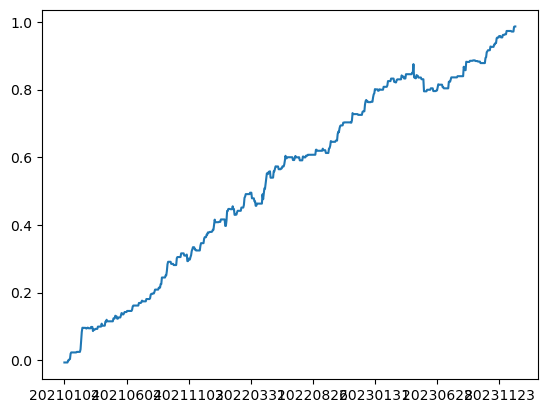

In [12]:
event = pd.DataFrame(ff.read('Gpalpha015'),index = close.index,columns=ff.read('synergy').loc[:,'20210104':'20240101'].columns)
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(10).index
    ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
ret_all[-1] = 0.0
(ret_all * open_day.loc['20210104':'20240101']).cumsum().plot()

<Axes: >

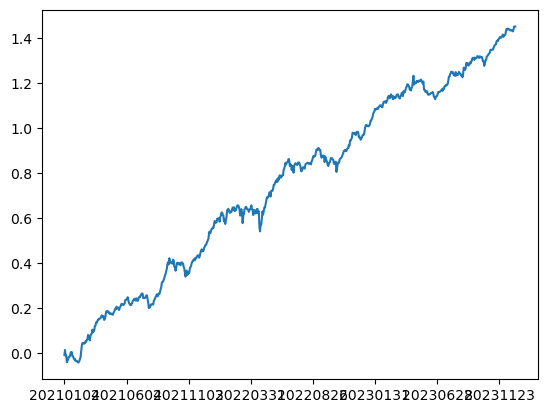

In [13]:
pd.Series(ret_all,index = open_day.loc['20210104':'20240101'].index).cumsum().plot()

In [15]:
open_day.loc['20210104':'20240101'].mean()

0.36176066024759285

<Axes: >

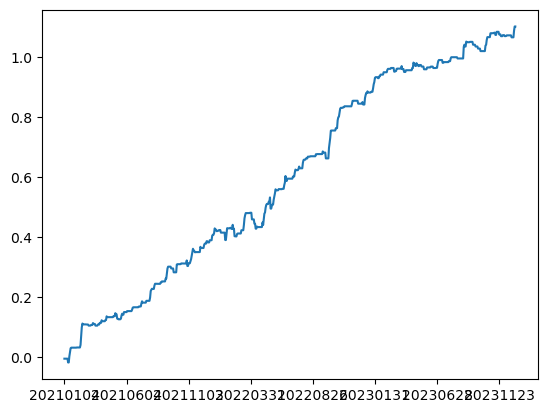

In [9]:
event = pd.DataFrame(ff.read('Gpalpha013'),index = close.index,columns=ff.read('synergy').loc[:,'20210104':'20240101'].columns)
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(100).index
    ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
ret_all[-1] = 0.0
(ret_all * open_day.loc['20210104':'20240101']).cumsum().plot()

<Axes: >

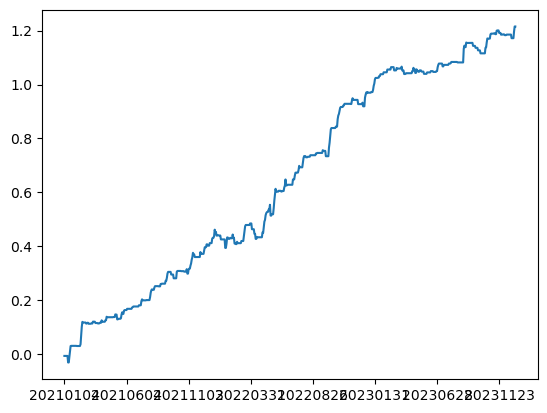

In [10]:
event = pd.DataFrame(ff.read('Gpalpha012'),index = close.index,columns=ff.read('synergy').loc[:,'20210104':'20240101'].columns)
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(100).index
    ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
ret_all[-1] = 0.0
(ret_all * open_day.loc['20210104':'20240101']).cumsum().plot()

<Axes: >

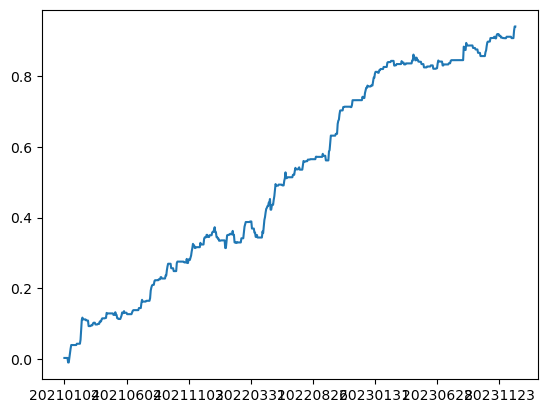

In [11]:
event = pd.DataFrame(ff.read('Gpalpha011'),index = close.index,columns=ff.read('synergy').loc[:,'20210104':'20240101'].columns)
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(100).index
    ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
ret_all[-1] = 0.0
(ret_all * open_day.loc['20210104':'20240101']).cumsum().plot()

In [12]:
open_day.loc['20210101':'20220101']

20210104    1
20210105    0
20210106    0
20210107    0
20210108    0
           ..
20211227    1
20211228    1
20211229    0
20211230    1
20211231    1
Name: 0, Length: 243, dtype: int64

<Axes: >

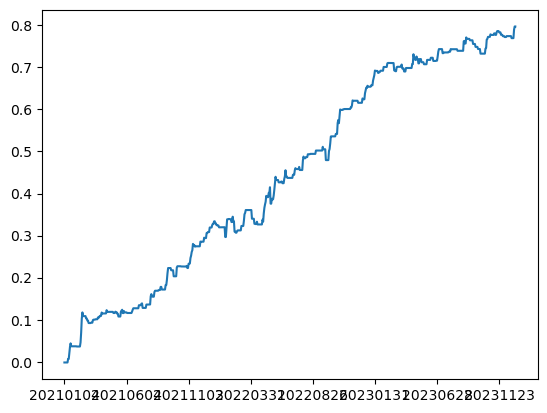

In [20]:
event = pd.DataFrame(ff.read('bias15').loc[:,'20210104':'20240101'] + ff.read('turnover_score_ts_std').loc[:,'20210104':'20240101'],index = close.index,columns=ff.read('synergy').loc[:,'20210104':'20240101'].columns)
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(20).index
    ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
ret_all[-1] = 0.0
(ret_all * open_day.loc['20210104':'20240101']).cumsum().plot()

<Axes: >

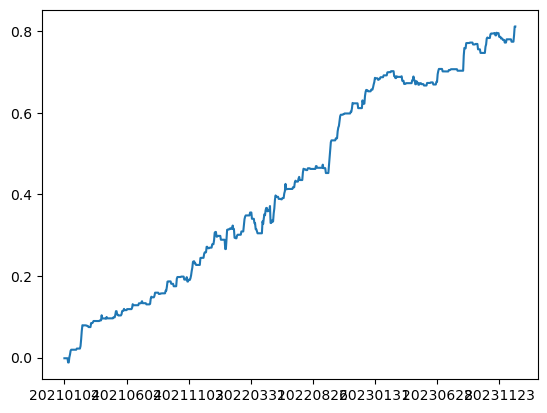

In [27]:
event = np.multiply(ff.read('turnover').loc[:,'20210104':'20240101'],np.add(pd.DataFrame(ff.read('amt_ma20').loc[:,'20210104':'20240101'],index= ff.read('turnover').index),pd.DataFrame(ff.read('roc30').loc[:,'20210104':'20240101'],index= ff.read('turnover').index)))
ret_all = []
for day in event.columns:
    buy_stock =  (event*ff.filter1.loc[:,'20210104':'20240101'])[day].dropna().sort_values().head(20).index
    ret_all.append(ret.shift(-1,axis = 1).loc[buy_stock][day].mean())
ret_all[-1] = 0.0
(ret_all * open_day.loc['20210104':'20240101']).cumsum().plot()